In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [4]:
train.shape

(27455, 785)

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
#Viewing all the unique labels
labels = train['label'].values
np.unique(np.array(labels))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [7]:
y_train = train['label']
x_train = train.drop(labels=['label'], axis=1)
y_train.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

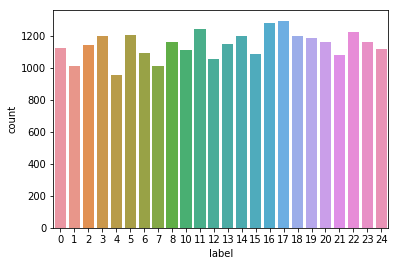

In [8]:
#plotting the freq of labels
g = sn.countplot(x=y_train,data=train)

In [9]:
#Check for null and missing values
x_train.isnull().values.any()

False

In [10]:
test.isnull().values.any()

False

In [11]:
#Converting the labels to binary labels array
binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
#Normalisation
x_train = x_train/255.0

In [13]:
# #Reshaping the values to 28X28X1 matrices
x_train = x_train.values.reshape(-1, 28, 28, 1)

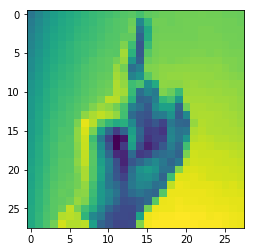

In [14]:
plt.imshow(x_train[0][:,:,0])

In [15]:
#Splitting the train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [17]:
num_classes = 24
batch_size = 128
epochs = 30

In [18]:
#creating the model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [19]:
#compiling the model
optimiser = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.9999, amsgrad=True)
model.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [20]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
# Data Augmentation
datagen = ImageDataGenerator(
      featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [22]:
#fit the model
model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // 128,
                              callbacks=[learning_rate_reduction], workers=4)
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/30
171/171 [==============================] - 87s 507ms/step - loss: 3.1401 - accuracy: 0.0660 - val_loss: 2.8182 - val_accuracy: 0.1960
Epoch 2/30
171/171 [==============================] - 86s 503ms/step - loss: 2.5222 - accuracy: 0.2423 - val_loss: 1.5664 - val_accuracy: 0.6095
Epoch 3/30
171/171 [==============================] - 86s 503ms/step - loss: 1.9278 - accuracy: 0.4033 - val_loss: 0.9722 - val_accuracy: 0.7463
Epoch 4/30
171/171 [==============================] - 86s 503ms/step - loss: 1.5904 - accuracy: 0.4968 - val_loss: 0.6855 - val_accuracy: 0.8283
Epoch 5/30
171/171 [==============================] - 85s 499ms/step - loss: 1.3374 - accuracy: 0.5706 - val_loss: 0.5016 - val_accuracy: 0.8802
Epoch 6/30
171/171 [==============================] - 86s 502ms/step - loss: 1.1582 - accuracy: 0.6223 - val_loss: 0.3908 - val_accuracy: 0.9151
Epoch 7/30
171/171 [==============================] - 86s 504ms/step - loss: 1.0099 - accuracy: 0.6689 - val_loss: 0.3025 - val_ac

In [23]:
test_labels = test['label']
test_labels = binarizer.fit_transform(test_labels)
test.drop(labels=['label'], axis=1, inplace=True)
test = test/255.0
test = test.values.reshape(-1, 28, 28, 1)

In [24]:
pred = model.predict(test)
print(accuracy_score(test_labels, pred.round()))

0.9882877858337981
